In [58]:
import random as rd
import numpy as np
import pandas as pd
import csv

#Membuat head data
iterasi = []
datadesk = [["CallNumber", "InterArrival Time", "Arrival Time", 
         "When A Available", "When B Available", 
         "Server Chosen","service Time","Time Service Begins",
         "Service Completion A","Service Completion B",
         "Caller Delay","Time In Sistem"]]

In [59]:
def desk(x):
    CallNumber = 0
    intterArrival = [0]
    arivalTime = [0]
    WhenAAvailable = []
    WhenBAvailable = []
    ServerChosen = []
    TServiceBegin = [0]
    ServiceCompletionA = []
    ServiceCompletionB = []
    CallerDelay = []
    TimeInSistem = []
    serviceTime = []
    total = []
    with open(x, "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerows(datadesk)
        for cc in range(100):
            total.append([])
            for i in range(1):
                data=[]
                CallNumber +=1 #Jumlah number tambah 1

            #   Pelanggan -> data
                data.append(CallNumber)
            #   Waktu kedatangan -> data
                data.append(intterArrival[-1])

            #   Waktu tiba
                b=arivalTime[-1]+intterArrival[-1]
            #   Nilai Random
                intterArrival.append(rd.randrange(1,8))

            #   Memanggil waktu tiba
                arivalTime.append(b)
            #   Waktu tiba di mulai dari index ke 0 
                data.append(arivalTime[-1])

            #   Si A siap
                if(len(WhenAAvailable) > 1):
                    if(ServiceCompletionA[-1]-ServiceCompletionA[-2]!=0):
                        WhenAAvailable.append(ServiceCompletionA[-1])
                        data.append(WhenAAvailable[-1])
                    else:
                        WhenAAvailable.append(WhenAAvailable[-1])
                        data.append(WhenAAvailable[-1])
                elif(len(WhenAAvailable) == 1):
                    WhenAAvailable.append(ServiceCompletionA[-1]-WhenAAvailable[-1])
                    data.append(WhenAAvailable[-1])
                else:
                    WhenAAvailable.append(0)
                    data.append(WhenAAvailable[-1])

             #   WhenAbleAvailable -> data   
                if(len(WhenBAvailable) > 1):
                    if(ServiceCompletionB[-1]-ServiceCompletionB[-2]!=0):
                        WhenBAvailable.append(ServiceCompletionB[-1])
                        data.append(WhenBAvailable[-1])
                    else:
                        WhenBAvailable.append(WhenBAvailable[-1])
                        data.append(WhenBAvailable[-1])
                elif(len(WhenBAvailable) == 1):
                    WhenBAvailable.append(ServiceCompletionB[-1]-WhenBAvailable[-1])
                    data.append(WhenBAvailable[-1])
                else:
                    WhenBAvailable.append(0)
                    data.append(WhenBAvailable[-1])

                if(WhenAAvailable[-1]-WhenBAvailable[-1]<=0):
                    #  get value Service Time
                    serviceTime.append(rd.randrange(2,6))
                    #  get value ServerChosen
                    ServerChosen.append('Si A')
                    #   ServerChosen -> data
                    data.append(ServerChosen[-1])
                    #   Service Time -> data
                    data.append(serviceTime[-1])
                else:
                    #  get value Service Time
                    serviceTime.append(rd.randrange(3,7))
                    #  get value ServerChosen
                    ServerChosen.append('Si B')
                    #   ServerChosen -> data
                    data.append(ServerChosen[-1])
                    #   Service Time -> data
                    data.append(serviceTime[-1])


                #  get value CallerDelay && TServiceBegin
                if(ServerChosen[-1]=='Si A'):
                    if(len(ServiceCompletionA) != 0):
                        if(ServiceCompletionA[-1] - arivalTime[-1] <0):
                            TServiceBegin.append(arivalTime[-1])
                            CallerDelay.append(0)
                        else:
                            TServiceBegin.append(ServiceCompletionA[-1])
                            CallerDelay.append(ServiceCompletionA[-1] - arivalTime[-1])
                    else:
                        if( 0 - arivalTime[-1] <0):
                            TServiceBegin.append(arivalTime[-1])
                            CallerDelay.append(0)
                        else:
                            TServiceBegin.append(0)
                            CallerDelay.append(0)        
                else:
                    if(len(ServiceCompletionB) != 0):
                        if(ServiceCompletionB[-1] - arivalTime[-1] <0):
                            TServiceBegin.append(arivalTime[-1])
                            CallerDelay.append(0)
                        else:
                            TServiceBegin.append(ServiceCompletionB[-1])
                            CallerDelay.append(ServiceCompletionB[-1] - arivalTime[-1])
                    else:
                        if( 0 - arivalTime[-1] <0):
                            TServiceBegin.append(arivalTime[-1])
                            CallerDelay.append(0)
                        else:
                            TServiceBegin.append(0)
                            CallerDelay.append(ServiceCompletionB[-1] - arivalTime[-1])

            #   Time Sevice Begins -> data
                data.append(TServiceBegin[-1])

                if(len(TServiceBegin) != 0):
                    c = serviceTime[-1]+TServiceBegin[-1]
                else:
                    c = serviceTime[-1]+0

                #  get value ServiceCompletionBaker
                if(ServerChosen[-1]=='Si A'):    
                    ServiceCompletionA.append(c)
                    if(len(ServiceCompletionB) != 0):
                        ServiceCompletionB.append(ServiceCompletionB[-1])
                    else:
                        ServiceCompletionB.append(0)
                    #   Service Completions -> data
                    data.append(ServiceCompletionA[-1])
                    data.append(ServiceCompletionB[-1])
                else:
                    ServiceCompletionB.append(c)
                    if(len(ServiceCompletionA) != 0):
                        ServiceCompletionA.append(ServiceCompletionA[-1])
                    else:
                        ServiceCompletionA.append(0)
                    #   Service Completions -> data
                    data.append(ServiceCompletionA[-1])
                    data.append(ServiceCompletionB[-1])

                #   Caller Delay -> data
                data.append(CallerDelay[-1])

            #   get value Time in Sistem 
                TimeInSistem.append(CallerDelay[-1]+serviceTime[-1])
            #   Time in Sistem -> data
                data.append(TimeInSistem[-1])

                print(data)
                total[cc].append(data)

                
                writer.writerows(total[cc])
            
    iterasi.append(total)

In [60]:
im = ['dataiterasi1.csv','dataiterasi2.csv','dataiterasi3.csv','dataiterasi4.csv','dataiterasi5.csv','dataiterasi6.csv','dataiterasi7.csv','dataiterasi8.csv','dataiterasi9.csv','dataiterasi10.csv']
for b in range(10):
    a = im[b]
    desk(a)

[1, 0, 0, 0, 0, 'Si A', 4, 0, 4, 0, 0, 4]
[2, 6, 6, 4, 0, 'Si B', 6, 6, 4, 12, 0, 6]
[3, 5, 11, 4, 12, 'Si A', 2, 11, 13, 12, 0, 2]
[4, 5, 16, 13, 12, 'Si B', 6, 16, 13, 22, 0, 6]
[5, 7, 23, 13, 22, 'Si A', 2, 23, 25, 22, 0, 2]
[6, 1, 24, 25, 22, 'Si B', 4, 24, 25, 28, 0, 4]
[7, 2, 26, 25, 28, 'Si A', 3, 26, 29, 28, 0, 3]
[8, 2, 28, 29, 28, 'Si B', 6, 28, 29, 34, 0, 6]
[9, 4, 32, 29, 34, 'Si A', 4, 32, 36, 34, 0, 4]
[10, 3, 35, 36, 34, 'Si B', 6, 35, 36, 41, 0, 6]
[11, 7, 42, 36, 41, 'Si A', 3, 42, 45, 41, 0, 3]
[12, 7, 49, 45, 41, 'Si B', 5, 49, 45, 54, 0, 5]
[13, 3, 52, 45, 54, 'Si A', 2, 52, 54, 54, 0, 2]
[14, 2, 54, 54, 54, 'Si A', 5, 54, 59, 54, 0, 5]
[15, 6, 60, 59, 54, 'Si B', 3, 60, 59, 63, 0, 3]
[16, 5, 65, 59, 63, 'Si A', 3, 65, 68, 63, 0, 3]
[17, 2, 67, 68, 63, 'Si B', 3, 67, 68, 70, 0, 3]
[18, 4, 71, 68, 70, 'Si A', 3, 71, 74, 70, 0, 3]
[19, 2, 73, 74, 70, 'Si B', 4, 73, 74, 77, 0, 4]
[20, 2, 75, 74, 77, 'Si A', 4, 75, 79, 77, 0, 4]
[21, 2, 77, 79, 77, 'Si B', 6, 77, 79, 83

[33, 4, 136, 137, 129, 'Si B', 5, 136, 137, 141, 0, 5]
[34, 5, 141, 137, 141, 'Si A', 2, 141, 143, 141, 0, 2]
[35, 1, 142, 143, 141, 'Si B', 3, 142, 143, 145, 0, 3]
[36, 3, 145, 143, 145, 'Si A', 3, 145, 148, 145, 0, 3]
[37, 4, 149, 148, 145, 'Si B', 3, 149, 148, 152, 0, 3]
[38, 2, 151, 148, 152, 'Si A', 2, 151, 153, 152, 0, 2]
[39, 7, 158, 153, 152, 'Si B', 3, 158, 153, 161, 0, 3]
[40, 2, 160, 153, 161, 'Si A', 5, 160, 165, 161, 0, 5]
[41, 5, 165, 165, 161, 'Si B', 4, 165, 165, 169, 0, 4]
[42, 7, 172, 165, 169, 'Si A', 4, 172, 176, 169, 0, 4]
[43, 4, 176, 176, 169, 'Si B', 3, 176, 176, 179, 0, 3]
[44, 1, 177, 176, 179, 'Si A', 2, 177, 179, 179, 0, 2]
[45, 5, 182, 179, 179, 'Si A', 4, 182, 186, 179, 0, 4]
[46, 7, 189, 186, 179, 'Si B', 3, 189, 186, 192, 0, 3]
[47, 5, 194, 186, 192, 'Si A', 4, 194, 198, 192, 0, 4]
[48, 4, 198, 198, 192, 'Si B', 5, 198, 198, 203, 0, 5]
[49, 6, 204, 198, 203, 'Si A', 4, 204, 208, 203, 0, 4]
[50, 6, 210, 208, 203, 'Si B', 3, 210, 208, 213, 0, 3]
[51, 7, 21

In [61]:
rowB = [];rowC = [];rowD = [];rowE = [];rowF = [];rowG = [];rowH = [];rowI = [];rowJ = [];rowK = []

In [62]:
for m in range(10):
    for l in range(100):
        for a in range(1):
            p = iterasi[m][l][a][10]
            if(m == 0):rowB.append(p)
            if(m == 1):rowC.append(p)
            if(m == 2):rowD.append(p)
            if(m == 3):rowE.append(p)
            if(m == 4):rowF.append(p)
            if(m == 5):rowG.append(p)
            if(m == 6):rowH.append(p)
            if(m == 7):rowI.append(p)
            if(m == 8):rowJ.append(p)
            if(m == 9):rowK.append(p)

In [63]:
import matplotlib.pyplot as plt
import collections

averagelist = []

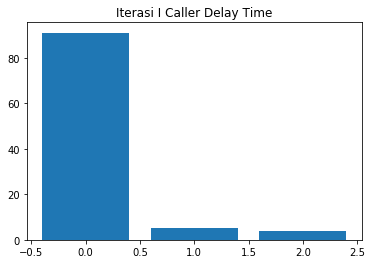

In [64]:
a = collections.Counter(rowB)
plt.bar(a.keys(), a.values())
plt.title('Iterasi I Caller Delay Time')

averagelist.append(np.average(rowB))

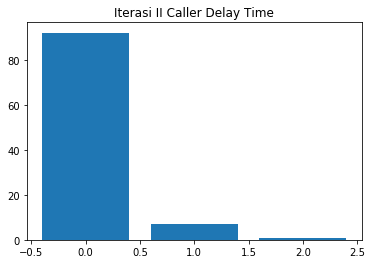

In [65]:
a = collections.Counter(rowC)
plt.bar(a.keys(), a.values())
plt.title('Iterasi II Caller Delay Time')

averagelist.append(np.average(rowC))

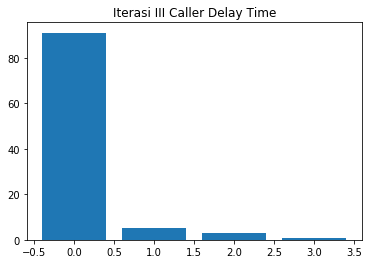

In [66]:
a = collections.Counter(rowD)
plt.bar(a.keys(), a.values())
plt.title('Iterasi III Caller Delay Time')

averagelist.append(np.average(rowD))

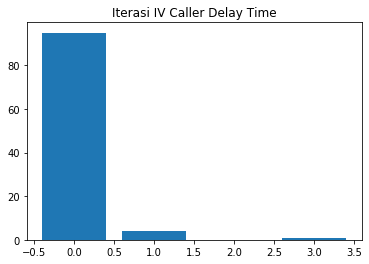

In [67]:
a = collections.Counter(rowE)
plt.bar(a.keys(), a.values())
plt.title('Iterasi IV Caller Delay Time')

averagelist.append(np.average(rowE))

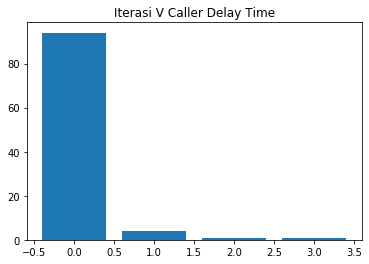

In [68]:
a = collections.Counter(rowF)
plt.bar(a.keys(), a.values())
plt.title('Iterasi V Caller Delay Time')

averagelist.append(np.average(rowF))

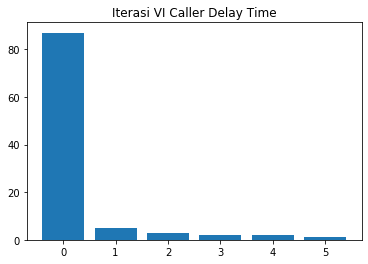

In [69]:
a = collections.Counter(rowG)
plt.bar(a.keys(), a.values())
plt.title('Iterasi VI Caller Delay Time')

averagelist.append(np.average(rowG))

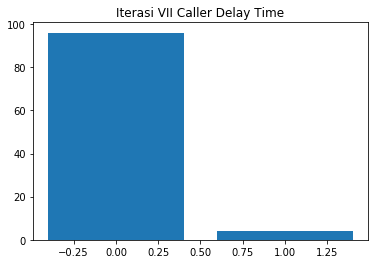

In [70]:
a = collections.Counter(rowH)
plt.bar(a.keys(), a.values())
plt.title('Iterasi VII Caller Delay Time')

averagelist.append(np.average(rowH))

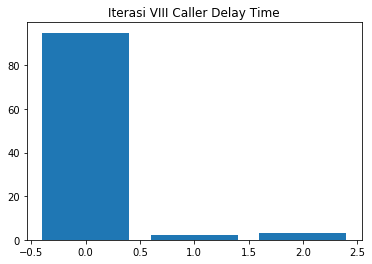

In [71]:
a = collections.Counter(rowI)
plt.bar(a.keys(), a.values())
plt.title('Iterasi VIII Caller Delay Time')

averagelist.append(np.average(rowI))

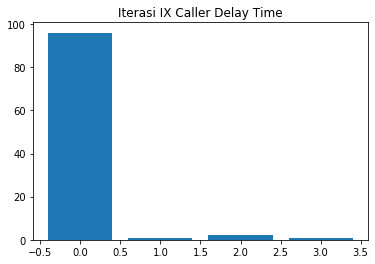

In [72]:
a = collections.Counter(rowJ)
plt.bar(a.keys(), a.values())
plt.title('Iterasi IX Caller Delay Time')

averagelist.append(np.average(rowJ))

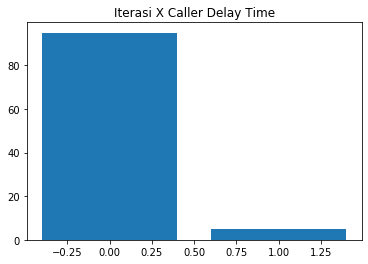

In [73]:
a = collections.Counter(rowK)
plt.bar(a.keys(), a.values())
plt.title('Iterasi X Caller Delay Time')

averagelist.append(np.average(rowK))

In [74]:
averagelist

[0.13, 0.09, 0.14, 0.07, 0.09, 0.3, 0.04, 0.08, 0.08, 0.05]

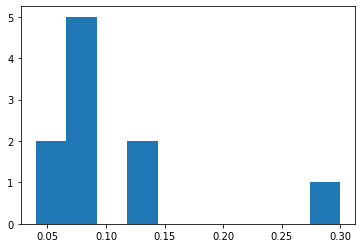

In [75]:
plt.hist(averagelist)
plt.show()